# Entanglement Examples

Entanglement allows you to query, create, and connect `Objects` in a knowledge graph. Let's add some top level imports that we'll need to get started

In [1]:
import geodesic
from geodesic.entanglement import Object, get_objects, add_connections, get_traits, Connection

PROJ: proj_create_from_database: Cannot find proj.db


First, let's get a project, or subgraph, that we want to work with

In [2]:
geodesic.set_active_project('docs-example')

{'name': 'docs-example',
 'alias': 'Docs Example Project',
 'description': 'Test project for illustration purposes',
 'owner': 'auth0|611c3d206a08f0006c8a9290',
 'keywords': '',
 'uid': 'b96a3c8f8104b671d19ff7dbad5b7026992d7643'}

Any time we create an object, it will default to this project. First, let's try seeing what's in there. We should start with nothing.

In [9]:
objects = get_objects()
objects

[]

Now let's create a new `Object`. Recall that only a few classes of `Object` are available:

* `Entity`
* `Dataset`
* `Observable`
* `Concept`
* `Property`
* `Link`
* `Model`
* `Event`

`Dataset` and `Model` are their own topic, but let's create a simple graph by creating an imaginary farm. 

In [57]:
# Here's a location. We can index points and polygons. This could just as easily be a Shapely geometry or anything that fullfils __geo_interface__
geometry = {'type': 'Point', 'coordinates': [-104.84, 39.64]}

# Some arbitrary imaginary metadata
item = {
    "owner": "Farmer Bill",
    "address": "123 Farmingville Drive, Aurora CO 80014",
    "new info": "valid"
}

farm = Object(
    name="whispering-pines-farm",
    description="Farmer Bill's farm. It grows food.",
    object_class='Entity', 
    domain="agriculture",
    category="*",
    type="farm",
    item=item,
    geometry=geometry
)

farm

entity:agriculture:*:farm:whispering-pines-farm

Here we've created a new Object, but not yet saved it to the graph. You can work with this object, edit as necessary to make sure it stores the data you want. 

POINT (-104.84 39.64)


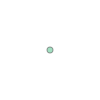

In [58]:
print(farm.geometry)
farm.geometry

You can inspect the raw contents, which is what will be sent to the backend when you actually create the object. 

In [59]:
dict(farm)

{'project': 'b96a3c8f8104b671d19ff7dbad5b7026992d7643',
 'name': 'whispering-pines-farm',
 'description': "Farmer Bill's farm. It grows food.",
 'class': 'Entity',
 'domain': 'agriculture',
 'category': '*',
 'type': 'farm',
 'item': {'owner': 'Farmer Bill',
  'address': '123 Farmingville Drive, Aurora CO 80014',
  'new info': 'valid'},
 'geometry': {'type': 'Point', 'coordinates': [-104.84, 39.64]}}

One quick technical note: Even though we created it using the `Object` class, the type of `farm` is actually `Entity`. When you create an `Object`, it actually returns the class corresponding to whatever `object_class` you passed in.

In [60]:
type(farm)

geodesic.entanglement.object.Entity

Now, let's save this object to the graph.

Note that in order to make connections on objects in the graph they must first be saved. Until saved they are just a local 
object and not yet in the Geodesic Platform.

In [61]:
farm.save()

In [55]:
objects = get_objects()
objects

[entity:agriculture:*:farm:whispering-pines-farm]

Now you can see the object is in the graph. Let's take a look at what's returned

In [56]:
dict(objects[0])

{'project': 'b96a3c8f8104b671d19ff7dbad5b7026992d7643',
 'uid': '0x2732',
 'class': 'Entity',
 'domain': 'agriculture',
 'category': '*',
 'type': 'farm',
 'name': 'whispering-pines-farm',
 'geometry': {'coordinates': [-104.84, 39.64], 'type': 'Point'},
 'item': {'address': '123 Farmingville Drive, Aurora CO 80014',
  'owner': 'Farmer Bill'},
 'description': "Farmer Bill's farm. It grows food."}

you can see that it's nearly the same object as what we sent, but now has the addition of a `uid` field. This uniquely identifies this object and can be used to get a specfic object:

In [14]:
obj = Object(uid='0x2721')
obj.load()

entity:agriculture:*:farm:whispering-pines-farm

Let's see how different ways of querying the graph can find (or not find) this `Object` again

In [11]:
get_objects(search='pines')

[entity:agriculture:*:farm:whispering-pines-farm]

In [12]:
get_objects(search='farm')

[entity:agriculture:*:farm:whispering-pines-farm]

In [13]:
get_objects(search='farmer')

[entity:agriculture:*:farm:whispering-pines-farm]

In [14]:
from shapely.geometry import box

get_objects(geometry=box(0, 0, 1, 1), spatial_predicate='intersects')  # note: intersects is the default

[]

In [15]:
get_objects(geometry=box(-104.85, 39.60, -104.83, 39.7), spatial_predicate='intersects')  # note: intersects is the default

[entity:agriculture:*:farm:whispering-pines-farm]

In [16]:
get_objects(search='farmer', project='global')

[]

We've added only one object so far, but now let's add another

In [17]:
link = Object(
    name="farm-info",
    description="a link to information about farms",
    object_class='Link',
    item={
        'href': 'https://en.wikipedia.org/wiki/Farm'
    }
)
link

link:*:*:*:farm-info

In [18]:
link.save()

In [19]:
dict(link)

{'project': 'b96a3c8f8104b671d19ff7dbad5b7026992d7643',
 'name': 'farm-info',
 'description': 'a link to information about farms',
 'class': 'Link',
 'item': {'href': 'https://en.wikipedia.org/wiki/Farm'},
 'uid': '0x2729'}

Now, I'm going to add a connection back to that original farm

In [20]:
farm.connect_with(
    predicate={
        'name': 'links'
    }, 
    object=link
)

entity:agriculture:*:farm:whispering-pines-farm --links--> link:*:*:*:farm-info

In [25]:
g = get_objects(as_graph=True)